In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.loadtxt('kmeans_data.csv', delimiter=',')
print('数据集大小：', len(dataset))

数据集大小： 80


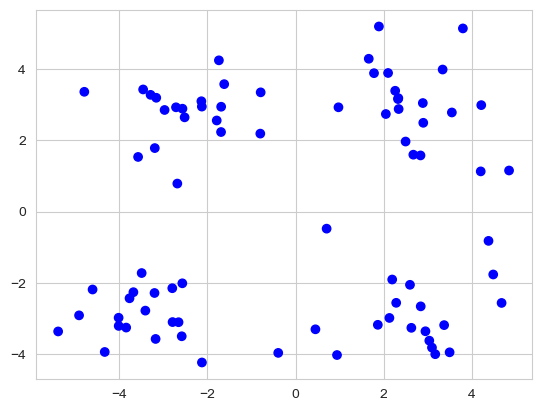

In [2]:
# 绘图函数
def show_cluster(dataset, cluster, centroids=None):
    # dataset：数据
    # centroids：聚类中心点的坐标
    # cluster：每个样本所属聚类
    # 不同种类的颜色，用以区分划分的数据的类别
    colors = np.array(['blue', 'red', 'green', 'purple'])
    # 画出所有样例
    plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[cluster])

    # 画出中心点
    if centroids is not None:
        K = len(centroids)
        plt.scatter(centroids[:, 0], centroids[:, 1],
            color=colors[:K], marker='+', s=150)

    plt.show()

# 初始时不区分类别
show_cluster(dataset, np.zeros(len(dataset), dtype=int))

In [3]:
def random_init(dataset, K):
    # 随机选取是不重复的
    idx = np.random.choice(np.arange(len(dataset)), size=K, replace=False)
    return dataset[idx]

In [4]:
def Kmeans(dataset, K, init_cent):
    # dataset：数据集
    # K：目标聚类数
    # init_cent：初始化中心点的函数
    centroids = init_cent(dataset, K)
    cluster = np.zeros(len(dataset), dtype=int)
    changed = True
    # 开始迭代
    itr = 0
    while changed:
        changed = False
        loss = 0
        for i, data in enumerate(dataset):
            # 寻找最近的中心点
            dis = np.sum((centroids - data) ** 2, axis=-1)
            k = np.argmin(dis)
            # 更新当前样本所属的聚类
            if cluster[i] != k:
                cluster[i] = k
                changed = True
            # 计算损失函数
            loss += np.sum((data - centroids[k]) ** 2)
        # 绘图
        print(f'Iteration {itr}, Loss {loss:.3f}')
        show_cluster(dataset, cluster, centroids)
        # 更新中心点
        for i in range(K):
            centroids[i] = np.mean(dataset[cluster == i], axis=0)
        itr += 1

    return centroids, cluster

Iteration 0, Loss 711.336


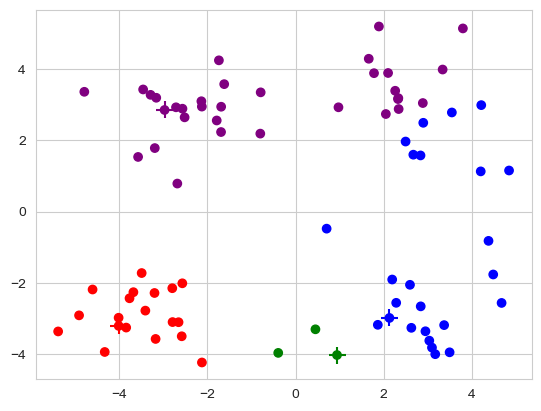

Iteration 1, Loss 409.495


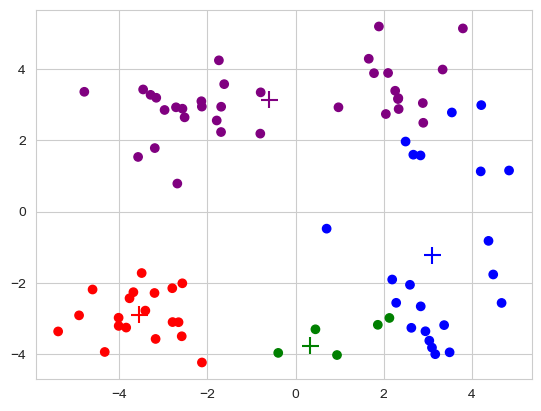

Iteration 2, Loss 395.264


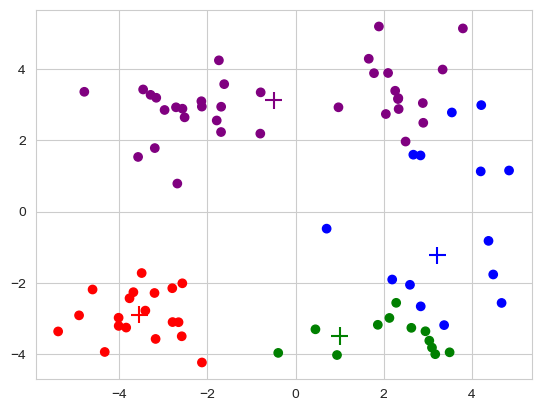

Iteration 3, Loss 346.068


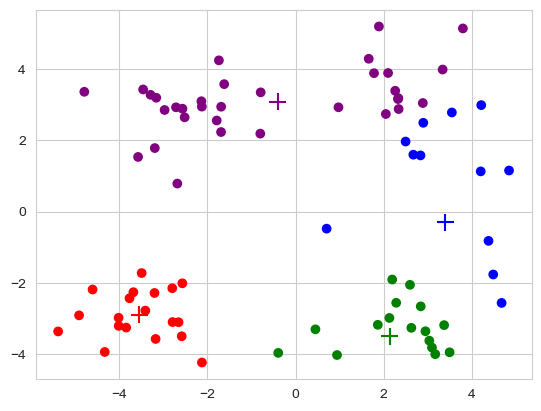

Iteration 4, Loss 294.244


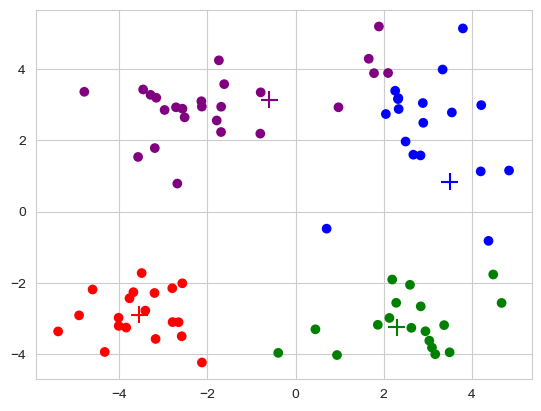

Iteration 5, Loss 178.808


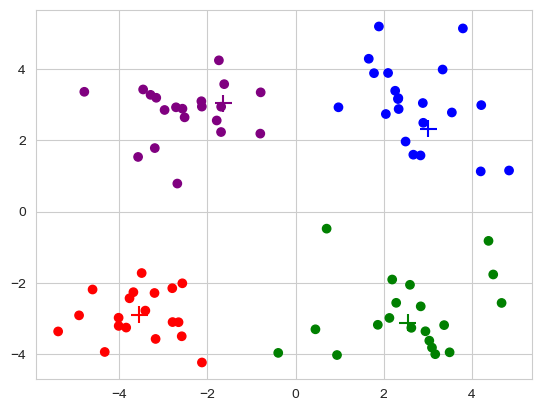

Iteration 6, Loss 151.090


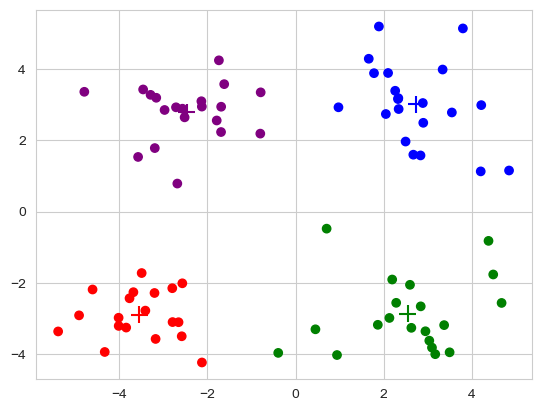

In [5]:
np.random.seed(0)
cent, cluster = Kmeans(dataset, 4, random_init)